In [1]:
%pip install gprofiler-official

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

# IO

In [4]:
import PineBioML.IO as IO

In [5]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_ccRCC_proteomics "

The data is from  [LinkedOmicsKB](https://kb.linkedomics.org/).

In [6]:
##### Read data method 2: read several files at once
x, group_label = IO.read_multiple_groups(
    [
        input_folder +
        "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt",
        input_folder +
        "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt"
    ],
    index_col=0,
    transpose=True  # Set True to transpose data before merging
)

y = group_label

In [7]:
x.head(5)

idx,ENSG00000000003.15,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001461.17,ENSG00000001497.16,...,ENSG00000168701.19,ENSG00000181631.7,ENSG00000185046.18,ENSG00000187626.9,ENSG00000197580.13,ENSG00000205060.11,ENSG00000211645.2,ENSG00000218336.9,ENSG00000230667.5,ENSG00000243232.6
0,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

# Preprocessing

In [9]:
# Convert ENSEMBL ID to gene symbol by gprofiler
x.columns = [col.split(".")[0] for col in x.columns]
gene_name = gp.convert(query=x.columns.to_list())["name"]

# For those who can't find a gene symbol, they will remain in ENSEMBL ID
matched = gene_name == "None"
x.columns = x.columns.where(matched, gene_name)

# The result
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,NIPAL3,LAS1L,...,TMEM208,P2RY13,ANKS1B,ZKSCAN4,BCO2,SLC35B4,IGLV1-50,TENM3,SETSIP,PCDHAC2
0,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
### Revert to Original scale
x = np.power(2, x)

In [11]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 50%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.5, strategy = "constant")
x = simple.fit_transform(x, y)

# retsult
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,LAS1L,ENPP4,...,IGHV1-69D,PAGR1,IGHV3-64D,IGHV5-10-1,IQCJ-SCHIP1,SCO2,MIURF,ENSG00000285723,ASDURF,DERPC
0,1.577003e+07,4.452421e+07,1.515005e+06,412195.029998,2.500253e+08,5.838602e+07,4.944778e+07,4.615653e+05,9.870520e+06,1.927286e+07,...,4.171632e+05,0.000000e+00,1.132988e+07,1.307512e+07,500761.839790,4.856449e+07,2.976494e+06,7.616187e+06,1.606048e+06,7.998814e+06
1,1.158489e+07,4.086881e+07,1.802902e+06,618997.312051,1.745664e+08,5.527797e+07,5.120709e+07,5.965628e+05,9.333354e+06,1.975832e+07,...,7.009272e+05,0.000000e+00,9.995554e+06,8.901724e+06,519397.129831,4.426385e+07,3.111857e+06,8.900577e+06,1.493852e+06,8.444307e+06
2,1.352156e+07,3.242864e+07,1.815784e+06,988815.550948,3.346041e+08,4.040644e+07,3.761815e+07,1.714096e+06,1.296209e+07,1.598119e+07,...,1.068798e+06,0.000000e+00,2.254598e+07,4.585925e+06,616126.588622,2.625604e+07,2.515705e+06,5.260971e+06,1.561090e+06,9.395700e+06
3,1.414546e+07,3.958667e+07,1.927626e+06,651269.819153,3.773170e+08,5.257057e+07,6.080757e+07,1.006156e+06,9.744856e+06,2.420615e+07,...,9.472778e+05,0.000000e+00,1.660177e+07,2.142705e+07,482998.878520,4.568375e+07,3.245089e+06,8.697766e+06,1.307165e+06,9.058640e+06
4,1.224236e+07,3.967937e+07,1.859621e+06,0.000000,3.068542e+08,8.520154e+07,5.350751e+07,9.782205e+05,1.002337e+07,1.740495e+07,...,0.000000e+00,1.214560e+06,2.384113e+07,3.265534e+07,767109.170522,5.551350e+07,4.141263e+06,1.055341e+07,1.316724e+06,8.411947e+06


In [12]:
# make a copy for volcanal plot
x_copy = x.copy()

In [13]:
from PineBioML.preprocessing import Normalizer
### within sample normalization
x = Normalizer(method = "Normalizer").fit_transform(x)

### standarization
x = (x-x.mean())/x.std()

from PineBioML.report.utils import data_overview

data_overview(x, y, label_name = "ccRCC tissue", title = "Example ccRCC Proteomics")

# Feature selection

In [14]:
from PineBioML.selection.Volcano import Volcano_selection

In [15]:
# Using volcano plot to select feature.
vol = Volcano_selection(k= -1, strategy = "p", log_domain=False, absolute= False)
vol.fit(x_copy, y)

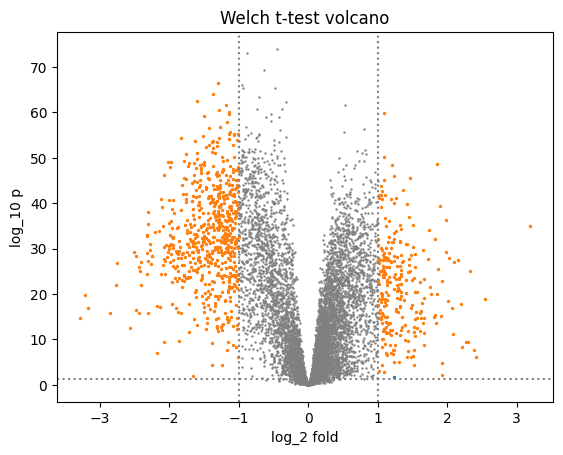

In [16]:
# Plot the vlcano plot.
vol.plotting()

In [17]:
from PineBioML.selection.classification import ensemble_selector, Lasso_selection

Using  c45  to score.


100%|██████████| 9028/9028 [00:00<00:00, 13314.75it/s]


c45  is done. Using 12.6669

Using  RF_gini  to score.
RF_gini  is done. Using 20.4946

Using  Lasso  to score.
Lasso  is done. Using 3.5154

Using  multi_Lasso  to score.
multi_Lasso  is done. Using 16.7326

Using  SVM  to score.
SVM  is done. Using 1.0052



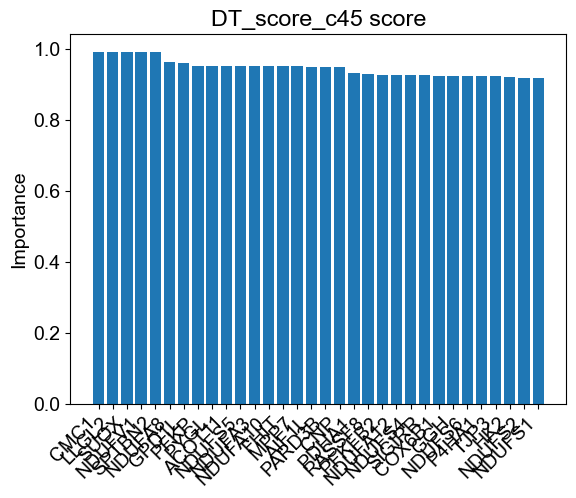

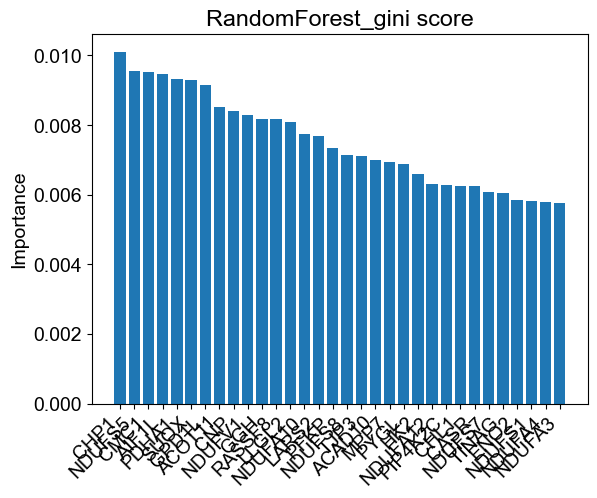

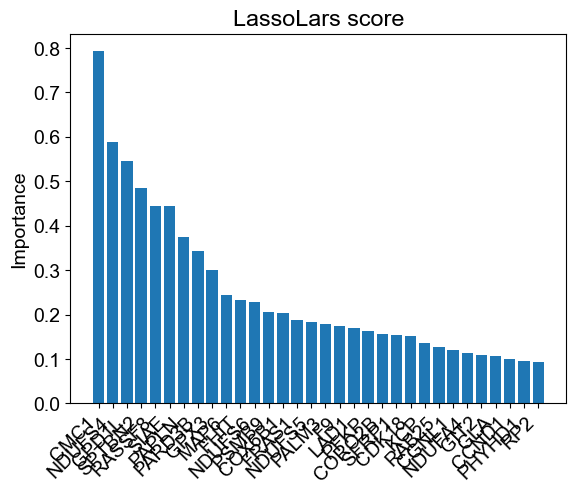

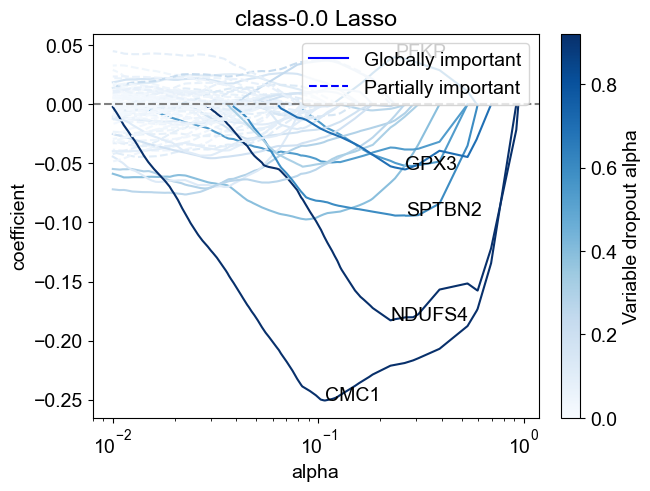

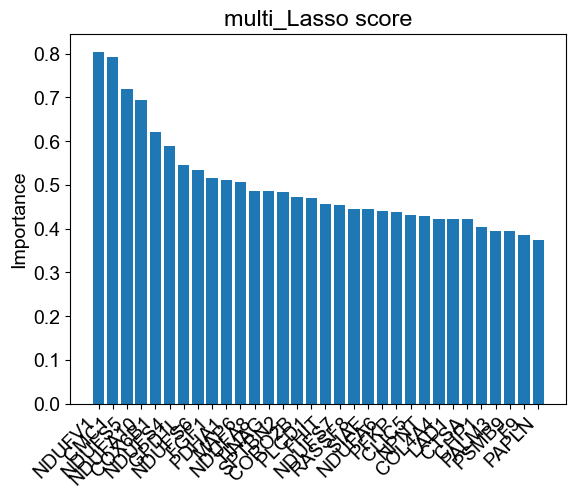

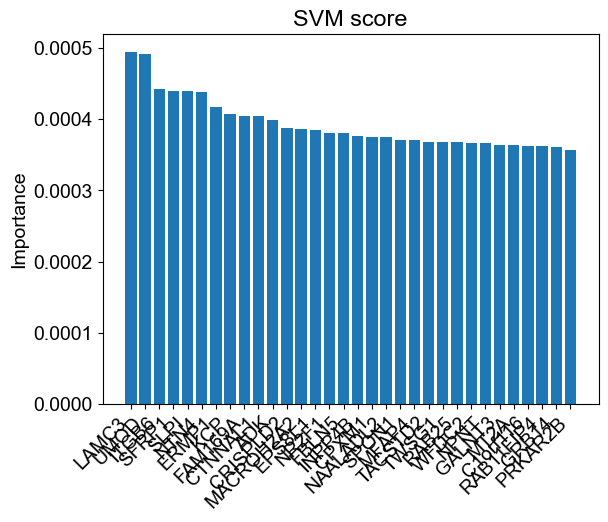

In [18]:
# Use several way to select features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
selector = ensemble_selector(k = 32)
selector.fit(x, y)
selector.Plotting()

In [19]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance = selector.what_matters()
importance

,DT_score_c45,RandomForest_gini,LassoLars,multi_Lasso,SVM,ensemble
CMC1,0.991727,0.009525,0.792283,0.792283,NaN,9.056269
LLGL2,0.991727,0.008093,NaN,NaN,NaN,2.281537
SUOX,0.991727,0.009283,NaN,NaN,NaN,3.107658
NDUFV1,0.991727,0.008284,NaN,0.804634,NaN,5.100454
SPTBN2,0.991727,NaN,0.484420,0.484420,NaN,3.147776
...,...,...,...,...,...,...
MT2A,NaN,NaN,NaN,NaN,0.000364,-0.214714
C1orf116,NaN,NaN,NaN,NaN,0.000363,-0.221802
RAB11FIP4,NaN,NaN,NaN,NaN,0.000362,-0.224716
GRB14,NaN,NaN,NaN,NaN,0.000362,-0.230753


In [20]:
selector.selected_score

CMC1        9.056269
NDUFV1      5.100454
GPD1L       3.900998
NDUFS5      3.153706
SPTBN2      3.147776
SUOX        3.107658
LLGL2       2.281537
NDUFA10     2.053478
NDUFS4      1.929060
AIF1L       1.469438
CHP1        0.951280
ACOT11      0.881720
PDHA1       0.785026
LAMC3       0.745608
CNP         0.729628
UMOD        0.719646
PARD3B      0.685221
SIAE        0.658861
NDUFA8      0.508815
RASSF8      0.381369
ITGB6       0.358500
SLPI        0.344096
NTN4        0.335999
GPX3        0.300642
ERMP1       0.181335
FGF1        0.134687
LARS2       0.103538
FAM169A     0.085188
CTNNAL1     0.084478
ADK         0.046250
MAP6        0.035190
CRISPLD2   -0.041295
Name: ensemble, dtype: float64

# Analysis utils

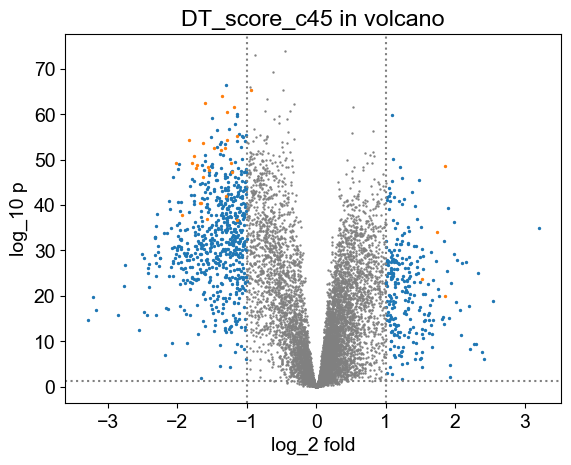

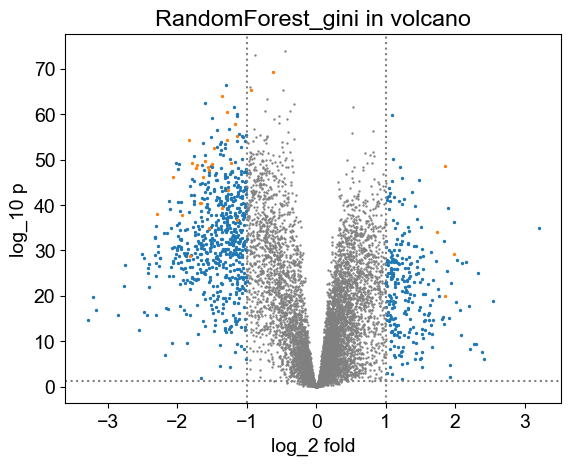

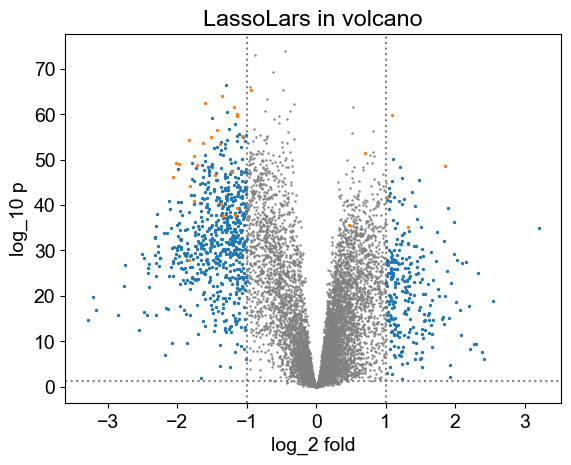

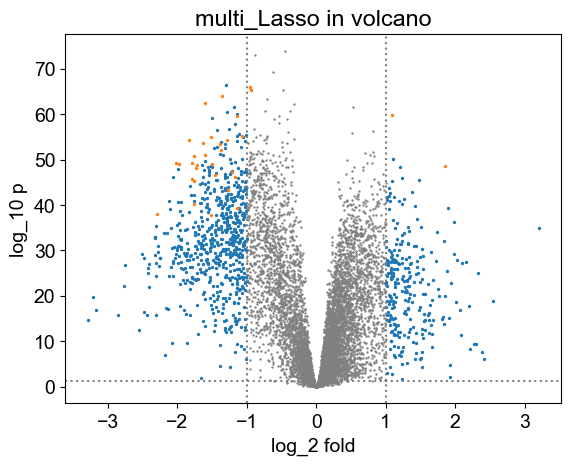

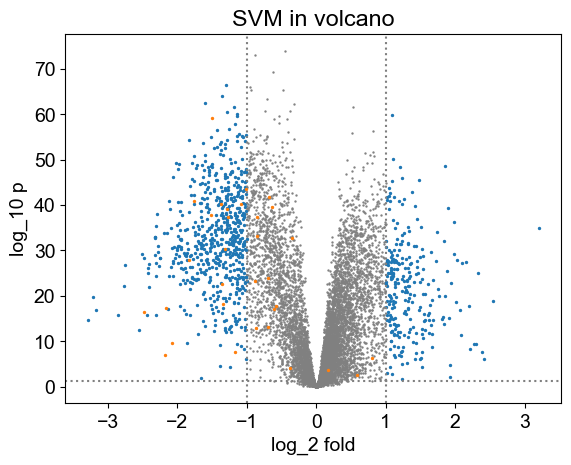

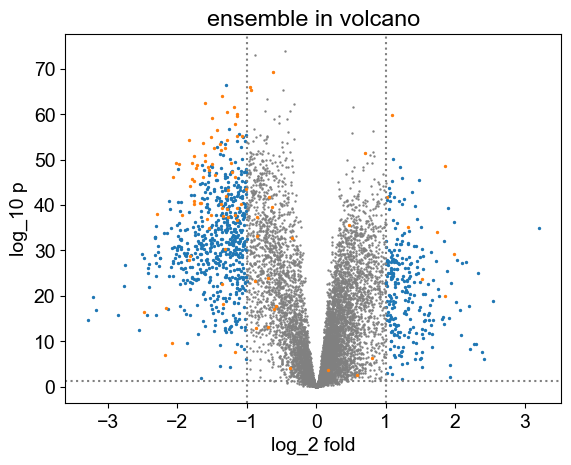

In [21]:
### Plot important features from diffirent methods on volcano plot.
for method in importance:
    vol.plotting(external=True,
                 external_score=importance[method].dropna(),
                 title=method + " in volcano",
                 show=False,
                 saving=True,
                 save_path="./output/images/" + export_title)

In [23]:
# Using g:profiler to do gene enrichment.
gp_enrichment_result = []
for method in importance.columns:
    gp_result = gp.profile(
        query=importance[method].dropna().index.to_list()).sort_values("p_value")
    gp_result["method"] = method
    gp_enrichment_result.append(gp_result[[
        "method", "source", "native", "parents", "p_value", "description",
        "intersection_size"
    ]])
gp_enrichment_result = pd.concat(gp_enrichment_result,
                                 axis=0).reset_index(drop=True)
# The result
gp_enrichment_result

,method,source,native,parents,p_value,description,intersection_size
0,DT_score_c45,GO:CC,GO:1990204,[GO:1902494],8.456167e-21,"""Any protein complex that possesses oxidoreduc...",14
1,DT_score_c45,GO:CC,GO:0030964,"[GO:0098796, GO:1990204]",3.614749e-18,"""An integral membrane complex that possesses N...",10
2,DT_score_c45,GO:CC,GO:0045271,"[GO:0030964, GO:0098803, GO:1902495]",3.614749e-18,"""Respiratory chain complex I is an enzyme of t...",10
3,DT_score_c45,GO:MF,GO:0008137,"[GO:0003954, GO:0009055, GO:0015078, GO:001545...",8.350229e-18,"""Catalysis of the reaction: NADH + ubiquinone ...",10
4,DT_score_c45,GO:MF,GO:0015453,[GO:0015399],8.510438e-18,"""Primary active transport of a solute across a...",11
...,...,...,...,...,...,...,...
763,ensemble,GO:MF,GO:0051540,[GO:0036094],2.907002e-02,"""Binding to a cluster of atoms including both ...",5
764,ensemble,GO:CC,GO:0071944,[GO:0110165],3.171609e-02,"""The broad region around and including the pla...",45
765,ensemble,GO:BP,GO:0006734,"[GO:0006163, GO:0046496]",3.918669e-02,"""The chemical reactions and pathways involving...",4
766,ensemble,CORUM,CORUM:2906,[CORUM:0000000],4.977242e-02,Respiratory chain complex I (intermediate II/2...,2


In [24]:
# Showing the top 10 significant result
gp_enrichment_result.sort_values("p_value").head(20)

,method,source,native,parents,p_value,description,intersection_size
0,DT_score_c45,GO:CC,GO:1990204,[GO:1902494],8.456167e-21,"""Any protein complex that possesses oxidoreduc...",14
585,ensemble,GO:MF,GO:0008137,"[GO:0003954, GO:0009055, GO:0015078, GO:001545...",3.330837e-20,"""Catalysis of the reaction: NADH + ubiquinone ...",14
586,ensemble,GO:MF,GO:0003954,[GO:0016651],1.073950e-19,"""Catalysis of the reaction: NADH + H+ + accept...",14
587,ensemble,GO:CC,GO:1990204,[GO:1902494],5.267305e-19,"""Any protein complex that possesses oxidoreduc...",18
588,ensemble,GO:MF,GO:0015453,[GO:0015399],9.607468e-19,"""Primary active transport of a solute across a...",15
590,ensemble,GO:CC,GO:0045271,"[GO:0030964, GO:0098803, GO:1902495]",1.489976e-18,"""Respiratory chain complex I is an enzyme of t...",13
589,ensemble,GO:CC,GO:0030964,"[GO:0098796, GO:1990204]",1.489976e-18,"""An integral membrane complex that possesses N...",13
591,ensemble,CORUM,CORUM:178,[CORUM:0000000],1.957348e-18,"Respiratory chain complex I (holoenzyme), mito...",14
1,DT_score_c45,GO:CC,GO:0030964,"[GO:0098796, GO:1990204]",3.614749e-18,"""An integral membrane complex that possesses N...",10
2,DT_score_c45,GO:CC,GO:0045271,"[GO:0030964, GO:0098803, GO:1902495]",3.614749e-18,"""Respiratory chain complex I is an enzyme of t...",10


In [26]:
gp_enrichment_result.groupby('method').count()['source']

method
DT_score_c45         192
LassoLars             54
RandomForest_gini    161
SVM                   18
ensemble             183
multi_Lasso          160
Name: source, dtype: int64

# Modeling

In [27]:
from PineBioML.model.supervised.Classification import SVM_tuner

In [32]:
svm = SVM_tuner().fit(selector.transform(x), y)
svm.plot()

optuna seed 14646  |  validation seed 6795  |  model seed 1903
    SVM start tuning. it will take a while.
optuna evaluate value 1.0 reachs matthews_corrcoef's maximun value 1
    optuna is better, best trial:  0


c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\_experimental.py:31: ExperimentalWarning:

Argument ``multivariate`` is an experimental feature. The interface can change in the future.



In [37]:
shap_values = svm.shap_explain(selector.transform(x).sample(16))

  0%|          | 0/16 [00:00<?, ?it/s]

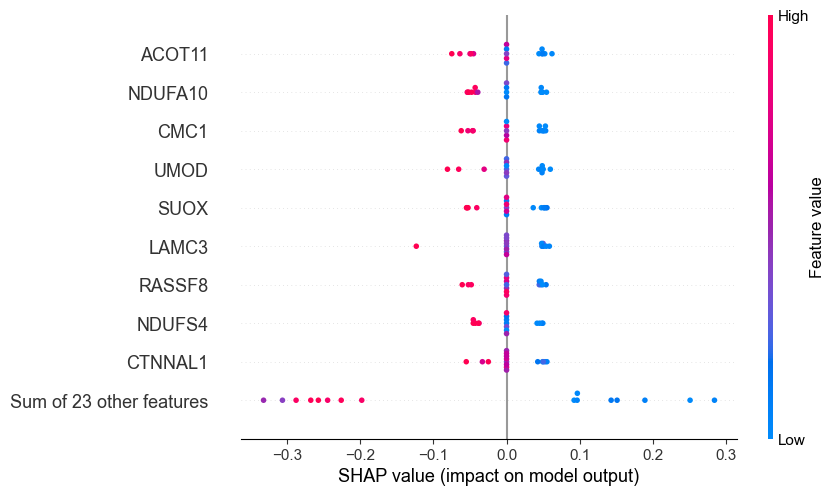

In [38]:
import shap
shap.plots.beeswarm(shap_values[:,:,1])

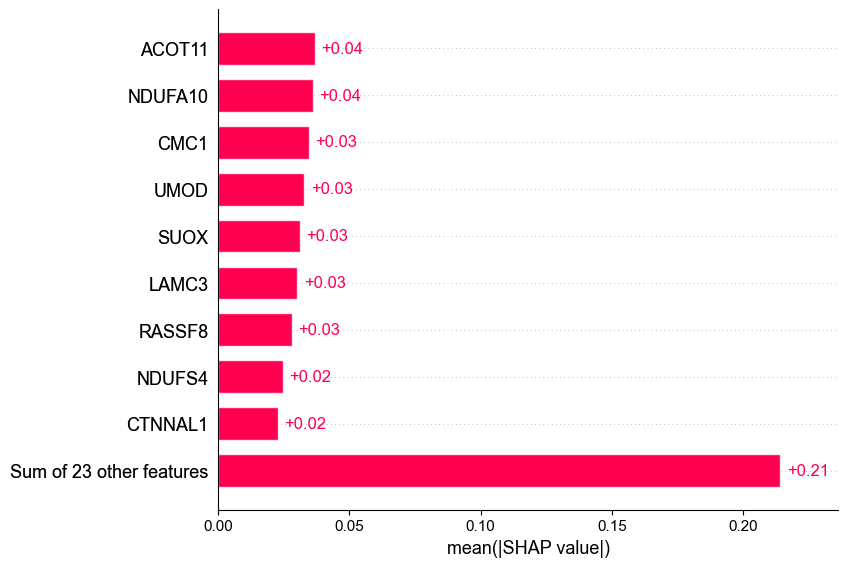

In [39]:
shap.plots.bar(shap_values[:,:,1])

# Output

In [40]:
# Save the result ro output_path
importance.to_csv(output_folder + export_title + " important feature.csv")
importance.to_csv(output_folder + export_title+ " importance.csv")
gp_enrichment_result.to_csv(output_folder + export_title+ " g_prophiler.csv")